# Linear Regression

## Visual Approach (Seaborn)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mpg = sns.load_dataset("mpg").dropna()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<AxesSubplot:xlabel='weight', ylabel='horsepower'>

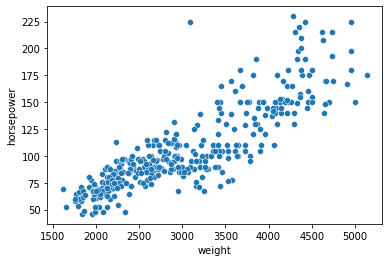

In [3]:
sns.scatterplot(x='weight', y='horsepower', data=mpg)

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

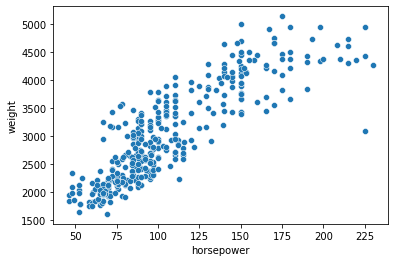

In [2]:
sns.scatterplot(x='horsepower', y='weight', data=mpg)

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

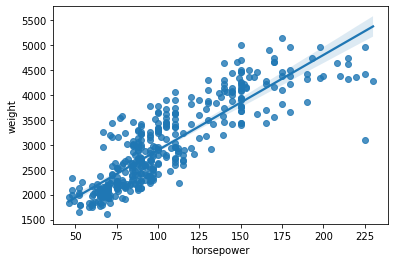

In [4]:
sns.regplot(x='horsepower', y='weight', data=mpg)

In [5]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


<AxesSubplot:xlabel='horsepower', ylabel='weight'>

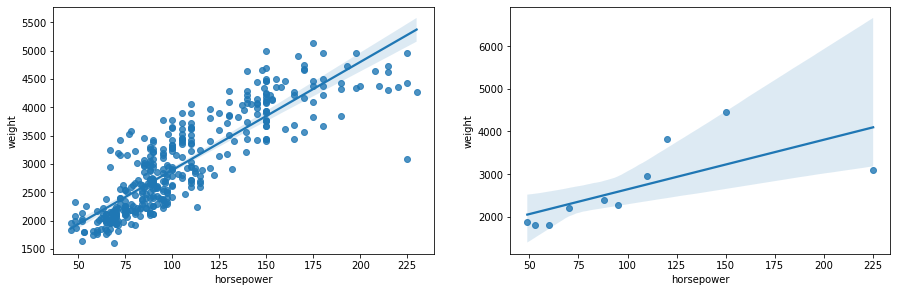

In [6]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.regplot(x='horsepower', y='weight', data=mpg, ci=95)
plt.subplot(2,2,2)
sns.regplot(x='horsepower', y='weight', data=mpg.sample(10, random_state=6), ci=95)

In [7]:
mpg.shape

(392, 9)

## Simple Linear Regression (with statsmodel)

### Statsmodel Traditional API

In [43]:
import statsmodels.api as sm
Y = mpg['weight']
X = mpg['horsepower']
model_std = sm.OLS(Y, X) # Finds the best beta

In [44]:
model_std = model_std.fit()

In [45]:
model_std.params

horsepower    27.378122
dtype: float64

In [46]:
model_std.rsquared

0.9689794164997969

In [47]:
model_std.predict(X) # The Y_pred (regression-line)

0      3559.155868
1      4517.390141
2      4106.718310
3      4106.718310
4      3832.937089
          ...     
393    2354.518497
394    1423.662347
395    2299.762253
396    2162.871643
397    2245.006009
Length: 392, dtype: float64

In [48]:
model_std.predict(0)

array([0.])

In [49]:
model_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 weight   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                          1.221e+04
Date:                Wed, 20 Jul 2022   Prob (F-statistic):                   5.37e-297
Time:                        09:59:59   Log-Likelihood:                         -3026.3
No. Observations:                 392   AIC:                                      6055.
Df Residuals:                     391   BIC:                                      6059.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower    27.3781      0.248    110.515      0.000      26.891      27.865
==============================================================================
Omnibus:                      101.879   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.753
Skew:                          -1.106   Prob(JB):                     4.67e-84
Kurtosis:                       7.313   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Statsmodel Formula API

In [50]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'weight ~ horsepower', data=mpg).fit()

In [51]:
model.predict(mpg['horsepower'])

0      3464.661329
1      4132.396983
2      3846.224560
3      3846.224560
4      3655.442944
          ...     
393    2625.222220
394    1976.564728
395    2587.065897
396    2491.675089
397    2548.909574
Length: 392, dtype: float64

In [52]:
model.params

Intercept     984.500327
horsepower     19.078162
dtype: float64

In [53]:
model.rsquared

0.7474254996898198

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          1.36e-118
Time:                        10:00:00   Log-Likelihood:                -2929.9
No. Observations:                 392   AIC:                             5864.
Df Residuals:                     390   BIC:                             5872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    984.5003     62.514     15.748      0.000     861.593    1107.408
horsepower    19.0782      0.562     33.972      0.000      17.974      20.182
==============================================================================
Omnibus:                       11.785   Durbin-Watson:                   0.933
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               21.895
Skew:                           0.109   Prob(JB):                     1.76e-05
Kurtosis:                       4.137   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residuals

In [55]:
y_true = mpg['weight']
y_true

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397    2720
Name: weight, Length: 392, dtype: int64

In [56]:
y_pred = model.predict(mpg['horsepower'])
y_pred

0      3464.661329
1      4132.396983
2      3846.224560
3      3846.224560
4      3655.442944
          ...     
393    2625.222220
394    1976.564728
395    2587.065897
396    2491.675089
397    2548.909574
Length: 392, dtype: float64

In [57]:
residuals = y_pred - y_true
residuals

0      -39.338671
1      439.396983
2      410.224560
3      413.224560
4      206.442944
          ...    
393   -164.777780
394   -153.435272
395    292.065897
396   -133.324911
397   -171.090426
Length: 392, dtype: float64

<AxesSubplot:ylabel='Count'>

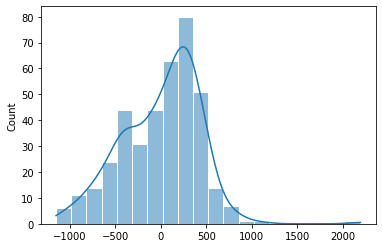

In [58]:
# visual check
sns.histplot(residuals, kde=True, edgecolor='w')

Text(0, 0.5, 'Residual weight')

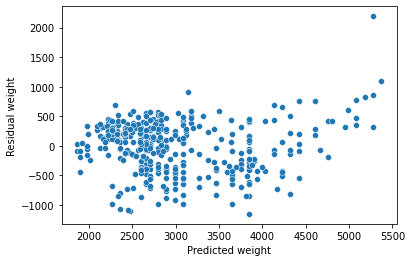

In [59]:
# Check with Residuals vs. Fitted scatterplot
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted weight')
plt.ylabel('Residual weight')

## Multivariate Linear Regressions

In [60]:
# run OLS model
model2 = smf.ols(formula='weight ~ horsepower + cylinders', data=mpg).fit()
model2.rsquared

0.8458154043882244

In [61]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1067.
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          1.19e-158
Time:                        10:21:18   Log-Likelihood:                -2833.1
No. Observations:                 392   AIC:                             5672.
Df Residuals:                     389   BIC:                             5684.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    528.8767     56.816      9.309      0.000     417.171     640.582
horsepower     8.2311      0.817     10.078      0.000       6.625       9.837
cylinders    290.3564     18.429     15.755      0.000     254.124     326.589
==============================================================================
Omnibus:                       11.977   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               23.325
Skew:                           0.076   Prob(JB):                     8.61e-06
Kurtosis:                       4.185   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Categorical features?

In [62]:
mpg['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [63]:
# Use C(variable) in the formula
model3 = smf.ols(formula='weight ~ C(origin)', data=mpg).fit()
model3.params

Intercept             2433.470588
C(origin)[T.japan]    -212.242740
C(origin)[T.usa]       939.019208
dtype: float64

In [65]:
# Drop the intercept if you want to 
model3 = smf.ols(formula='weight ~ C(origin) -1', data=mpg).fit()
model3.params

C(origin)[europe]    2433.470588
C(origin)[japan]     2221.227848
C(origin)[usa]       3372.489796
dtype: float64

In [69]:
mpg[['weight', 'origin']].groupby('origin').mean()

,weight
origin,
europe,2433.470588
japan,2221.227848
usa,3372.489796
